# **Clustering | Assignment**

**Question 1:** What is the difference between K-Means and Hierarchical Clustering?  Provide a use case for each.

**Answer:**

**Key Differences Between K-Means and Hierarchical Clustering**

| Feature                      | **K-Means**                         | **Hierarchical Clustering**                      |
| ---------------------------- | ----------------------------------- | ------------------------------------------------ |
| **Approach**                 | Partition-based (flat clustering)   | Tree-based (hierarchical, nested clusters)       |
| **Cluster Count Required?**  | Yes — must specify `k`              | No — builds a dendrogram; you choose `k` later   |
| **Algorithm Type**           | Iterative optimization              | Agglomerative (bottom-up) or divisive (top-down) |
| **Scalability**              | Fast, handles large datasets well   | Slower, O(n²), best for small–medium datasets    |
| **Cluster Shape Assumption** | Spherical clusters of similar size  | No strong shape assumption                       |
| **Output**                   | Flat clusters (hard assignments)    | Dendrogram + optional flat clusters              |
| **Reproducibility**          | Can vary with random initialization | Deterministic (if no distance ties)              |

**K-Means Clustering Use Case**

**Use When:**
* You know or can estimate the number of clusters (k)
* You have a large dataset
* Clusters are roughly spherical and evenly sized

**Example:**
* Customer Segmentation in marketing:
  * Group customers based on age, income, purchase behavior
  * Use k=4 to divide them into 4 buyer personas

**Hierarchical Clustering Use Case**

**Use When:**
* You want a hierarchy of clusters
* You don’t know the number of clusters in advance
* You need interpretability (via dendrogram)

**Example:**
* Gene Expression Analysis in bioinformatics:
  * Cluster genes based on expression patterns across conditions
  * Visualize relationships and similarities using a dendrogram

**Question 2:** Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

**Answer:**

**Silhouette Score in Clustering**

The Silhouette Score is a metric used to evaluate the quality of a clustering result — how well-separated and cohesive the clusters are.

**Purpose of the Silhouette Score**

To measure how similar each data point is to:
* Its own cluster (cohesion)
* Compared to other clusters (separation)

This helps assess:
* Whether the clusters are well-defined
* If the number of clusters is appropriate

**How It Works**

For a single sample i:
* a(i): average distance to all other points in the same cluster
* b(i): average distance to points in the nearest (next-best) cluster

Then:

    Silhouette Score for i= b(i) - a(i) / max(a(i), b(i))

**Score Range & Meaning**

| Silhouette Score | Interpretation                                        |
| ---------------- | ----------------------------------------------------- |
| **+1**           | Perfectly matched to its own cluster, far from others |
| **0**            | On or very close to the decision boundary             |
| **-1**           | Assigned to the wrong cluster                         |


**to Use It**
* Comparing different clustering algorithms (e.g., K-Means vs DBSCAN)
* Choosing the optimal number of clusters (k)
* Evaluating if your clustering makes sense structurally

**Question 3:** What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that groups together points that are closely packed and marks points in low-density regions as outliers.

It relies mainly on two key parameters:

**1. eps (Epsilon – Neighborhood Radius)**
* Defines the maximum distance between two points for one to be considered in the neighborhood of the other.

**Influence:**
* Too small: Most points become outliers, and very few clusters are formed.
* Too large: Points from different clusters may merge, reducing clustering quality.

**2. min_samples (Minimum Points to Form a Cluster)**
* The minimum number of points required in an eps-radius neighborhood to define a core point.

**Influence:**
* Too small: Small random clusters and more noise.
* Too large: Many points marked as outliers, fewer clusters.

Rule of thumb: min_samples ≥ number of features + 1

**Question 4:** Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:**

Clustering algorithms like K-Means and DBSCAN rely on distance-based measurements (e.g., Euclidean distance) to group data points. If features are not on the same scale, the results can be misleading or completely wrong.

**Feature Scaling**

Feature scaling is the process of normalizing or standardizing features so that they contribute equally to the distance calculation.

Common methods:

* Standardization: (z-score)

      Xscaled =​ X − μ​ / σ
* Min-Max Scaling:

      Xscaled ​= ​x − Xmin​​ / Xmax - Xmin

**Scaling Matters in Clustering:**
1. Distance-Based Algorithms Are Sensitive to Scale
* K-Means and DBSCAN use distance (e.g., Euclidean, Manhattan) to decide:
  * Which points belong to the same cluster.
  * How centroids (K-Means) or core points (DBSCAN) are defined.

If one feature has a larger numeric range, it will dominate the distance computation — skewing clustering results.

2. Different Units or Magnitudes

Example:
* Feature A: Age (0–100)
* Feature B: Income (0–100,000)

Without scaling, income overwhelms age in the distance metric — the algorithm may cluster based mostly on income.

3. More Accurate Cluster Shapes
* K-Means assumes spherical clusters — scaling helps it form meaningful spheres.
* DBSCAN relies on density within a radius eps — unscaled data makes it hard to choose eps consistently across dimensions.

**Question 5:** What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Answer:**

The Elbow Method is a visual technique used in K-Means clustering to help determine the optimal number of clusters (i.e. the best value for k).

**K-Means Clustering**

K-Means is an unsupervised learning algorithm that:
* Groups data into k clusters.
* Assigns each point to the nearest cluster center (centroid).
* The goal is to minimize the variance within each cluster (inertia).

**Elbow Method**

The Elbow Method helps find the best k by plotting:

    X-axis: Number of clusters (k)
    Y-axis: Inertia (within-cluster sum of squared errors, WCSS)

Then you look for an "elbow" in the plot — a point where the rate of decrease sharply slows down.

**How It Works**
1. Run K-Means for a range of k values (e.g. 1 to 10).
2. Calculate the inertia (WCSS) for each k.
3. Plot k vs inertia.
4. Look for the "elbow point" — the value of k after which the inertia stops dropping significantly.

This "elbow" is considered the optimal number of clusters because:
* Before the elbow: adding clusters improves the fit a lot.
* After the elbow: adding clusters gives diminishing returns.

**Why It’s Useful**
* Simple and intuitive
* Helps avoid overfitting with too many clusters
* Guides towards a balanced model (not too simple, not too complex)

**Limitations**
* The "elbow" isn't always clear or sharp.
* It’s subjective — depends on interpretation.
* Alternative methods: Silhouette Score, Gap Statistic, Davies-Bouldin Index.

**Dataset:**

Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.

**Question 6:** Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

(Include your Python code and output in the code box below.)

**Answer:**

In [1]:
# Generate synthetic data
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [2]:
y_true

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

In [3]:
# Apply KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans

KMeans(n_clusters=4, random_state=42)

In [4]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [5]:
labels = kmeans.predict(X)
labels

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

In [6]:
centers = kmeans.cluster_centers_
centers

array([[-2.60516878,  8.99280115],
       [-6.85126211, -6.85031833],
       [ 4.68687447,  2.01434593],
       [-8.83456141,  7.24430734]])

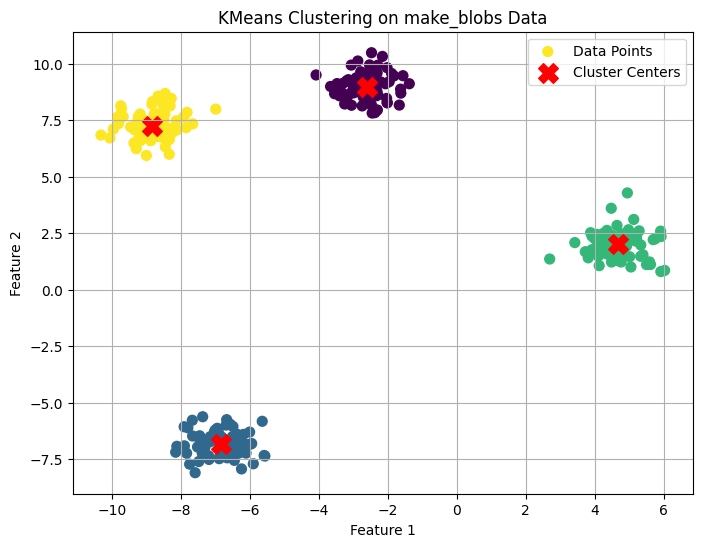

In [7]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

**Question 7:** Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise).

(Include your Python code and output in the code box below.)

**Answer:**

In [8]:
# Load Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()

In [9]:
X = wine.data

In [10]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [13]:
scaler

StandardScaler()

In [14]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
# Train DBSCAN model
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # You may tweak eps for different results

In [16]:
dbscan

DBSCAN(eps=1.2)

In [17]:
dbscan.fit(X_scaled)

DBSCAN(eps=1.2)

In [18]:
# Count clusters (excluding noise label -1)
labels = dbscan.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [19]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

0

In [20]:
print(f"Number of clusters found (excluding noise): {n_clusters}")

Number of clusters found (excluding noise): 0


**Question 8:** Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

(Include your Python code and output in the code box below.)

**Answer:**

In [21]:
# Generate moon-shaped data
import numpy as np
from sklearn.datasets import make_moons
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

In [22]:
y_true

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [23]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [25]:
dbscan

DBSCAN(eps=0.3)

In [26]:
labels = dbscan.fit_predict(X_scaled)
labels

array([ 0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,
        1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  1,  0,  1,
        1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,
        0,  1,  0,  1,  1,  0,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1,
        0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  1,  0, -1,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,
        0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,
        1,  0,  0,  1, -1,  0,  1,  0,  1,  0, -1,  1,  1])

In [27]:
# Identify outliers
outliers = labels == -1
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
core_samples = labels != -1
core_samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

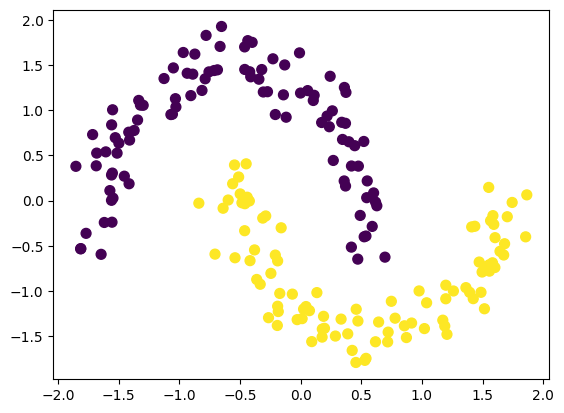

In [30]:
# Plot core cluster points
plt.scatter(X_scaled[core_samples, 0], X_scaled[core_samples, 1],
            c=labels[core_samples], cmap='viridis', s=50, label='Clustered Points')

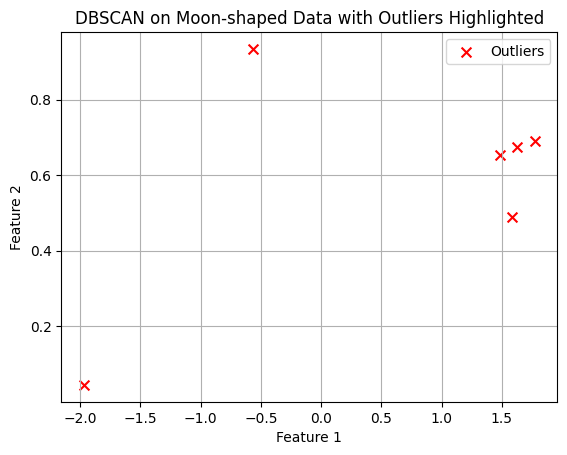

In [31]:
# Plot outliers
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c='red', s=50, marker='x', label='Outliers')
plt.title("DBSCAN on Moon-shaped Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

**Question 9:** Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

(Include your Python code and output in the code box below.)

**Answer:**

In [32]:
# Load Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

In [33]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [35]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [36]:
# Apply PCA to reduce to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [37]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster

AgglomerativeClustering(n_clusters=3)

In [38]:
labels = agg_cluster.fit_predict(X_scaled)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

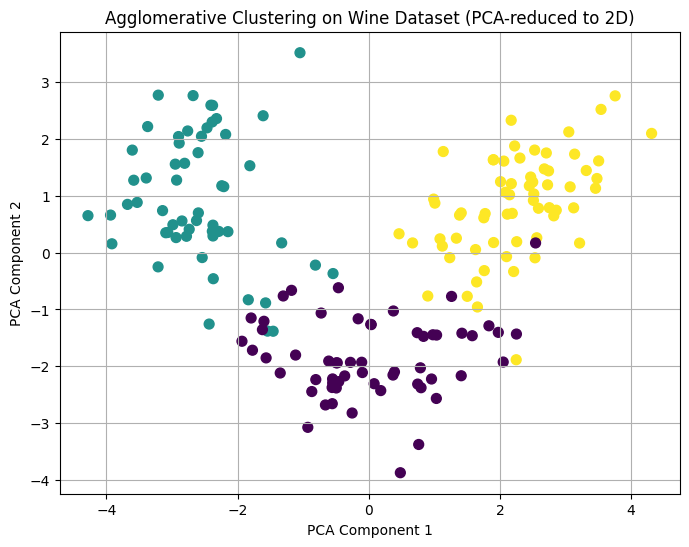

In [39]:
#  Visualize clusters in 2D
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

**Question 10:** You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:
* Which clustering algorithm(s) would you use and why?
* How would you preprocess the data (missing values, scaling)?
* How would you determine the number of clusters?
* How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

**Answer:**

In [40]:
import pandas as pd
import numpy as np

In [41]:
# Example synthetic dataset
data = {
    'Age': [25, 34, 45, 31, 50, 23, 38, 43, 29, 61],
    'Annual_Income': [50000, 64000, 82000, 56000, 90000, 48000, 67000, 79000, 52000, 100000],
    'Spending_Score': [60, 45, 30, 55, 20, 70, 40, 35, 65, 10],
    'Electronics_Purchases': [5, 2, 3, 6, 1, 7, 4, 3, 6, 1],
    'Fashion_Purchases': [10, 6, 4, 8, 3, 12, 7, 5, 11, 2]
}

In [42]:
data

{'Age': [25, 34, 45, 31, 50, 23, 38, 43, 29, 61],
 'Annual_Income': [50000,
  64000,
  82000,
  56000,
  90000,
  48000,
  67000,
  79000,
  52000,
  100000],
 'Spending_Score': [60, 45, 30, 55, 20, 70, 40, 35, 65, 10],
 'Electronics_Purchases': [5, 2, 3, 6, 1, 7, 4, 3, 6, 1],
 'Fashion_Purchases': [10, 6, 4, 8, 3, 12, 7, 5, 11, 2]}

In [43]:
df = pd.DataFrame(data)

In [44]:
df

,Age,Annual_Income,Spending_Score,Electronics_Purchases,Fashion_Purchases
0,25,50000,60,5,10
1,34,64000,45,2,6
2,45,82000,30,3,4
3,31,56000,55,6,8
4,50,90000,20,1,3
5,23,48000,70,7,12
6,38,67000,40,4,7
7,43,79000,35,3,5
8,29,52000,65,6,11
9,61,100000,10,1,2


In [45]:
# 1. Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
scaler

StandardScaler()

In [47]:
X_scaled = scaler.fit_transform(df)

In [48]:
X_scaled

array([[-1.13714883, -1.09280164,  0.90739287,  0.58834841,  0.98473193],
       [-0.34378918, -0.27901319,  0.1067521 , -0.88252261, -0.24618298],
       [ 0.62587261,  0.76728626, -0.69388867, -0.39223227, -0.86164044],
       [-0.6082424 , -0.74403516,  0.64051262,  1.07863874,  0.36927447],
       [ 1.06662797,  1.23230824, -1.22764918, -1.37281295, -1.16936916],
       [-1.31345098, -1.20905714,  1.44115338,  1.56892908,  1.60018938],
       [ 0.00881511, -0.10462994, -0.16012815,  0.09805807,  0.06154575],
       [ 0.44957047,  0.59290302, -0.42700841, -0.39223227, -0.55391171],
       [-0.78454454, -0.97654615,  1.17427313,  1.07863874,  1.29246066],
       [ 2.03628977,  1.81358571, -1.76140969, -1.37281295, -1.47709789]])

In [49]:
# 2. Elbow Method to find optimal K
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

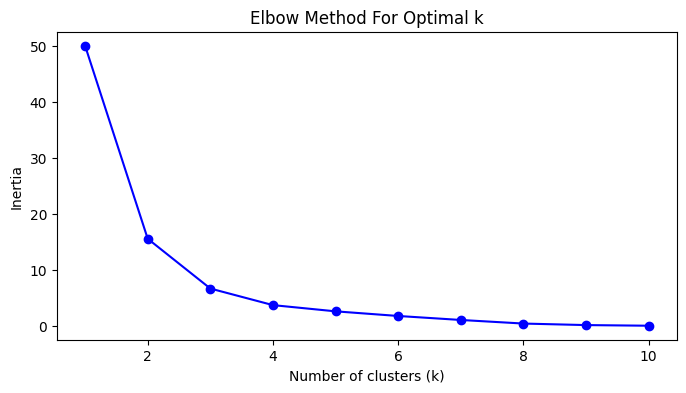

In [50]:
# Plot elbow
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# 3. KMeans Clustering with chosen k
optimal_k = 3  # Suppose elbow occurs at k=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [52]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [53]:
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [54]:
df['Cluster']

,Cluster
0,0
1,2
2,1
3,0
4,1
5,0
6,2
7,2
8,0
9,1


In [55]:
# 4. Cluster Summary
cluster_summary = df.groupby('Cluster').mean().round(2)
cluster_summary

,Age,Annual_Income,Spending_Score,Electronics_Purchases,Fashion_Purchases
Cluster,,,,,
0,27.00,51500.00,62.5,6.00,10.25
1,52.00,90666.67,20.0,1.67,3.00
2,38.33,70000.00,40.0,3.00,6.00


In [56]:
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
           Age  Annual_Income  Spending_Score  Electronics_Purchases  \
Cluster                                                                
0        27.00       51500.00            62.5                   6.00   
1        52.00       90666.67            20.0                   1.67   
2        38.33       70000.00            40.0                   3.00   

         Fashion_Purchases  
Cluster                     
0                    10.25  
1                     3.00  
2                     6.00  


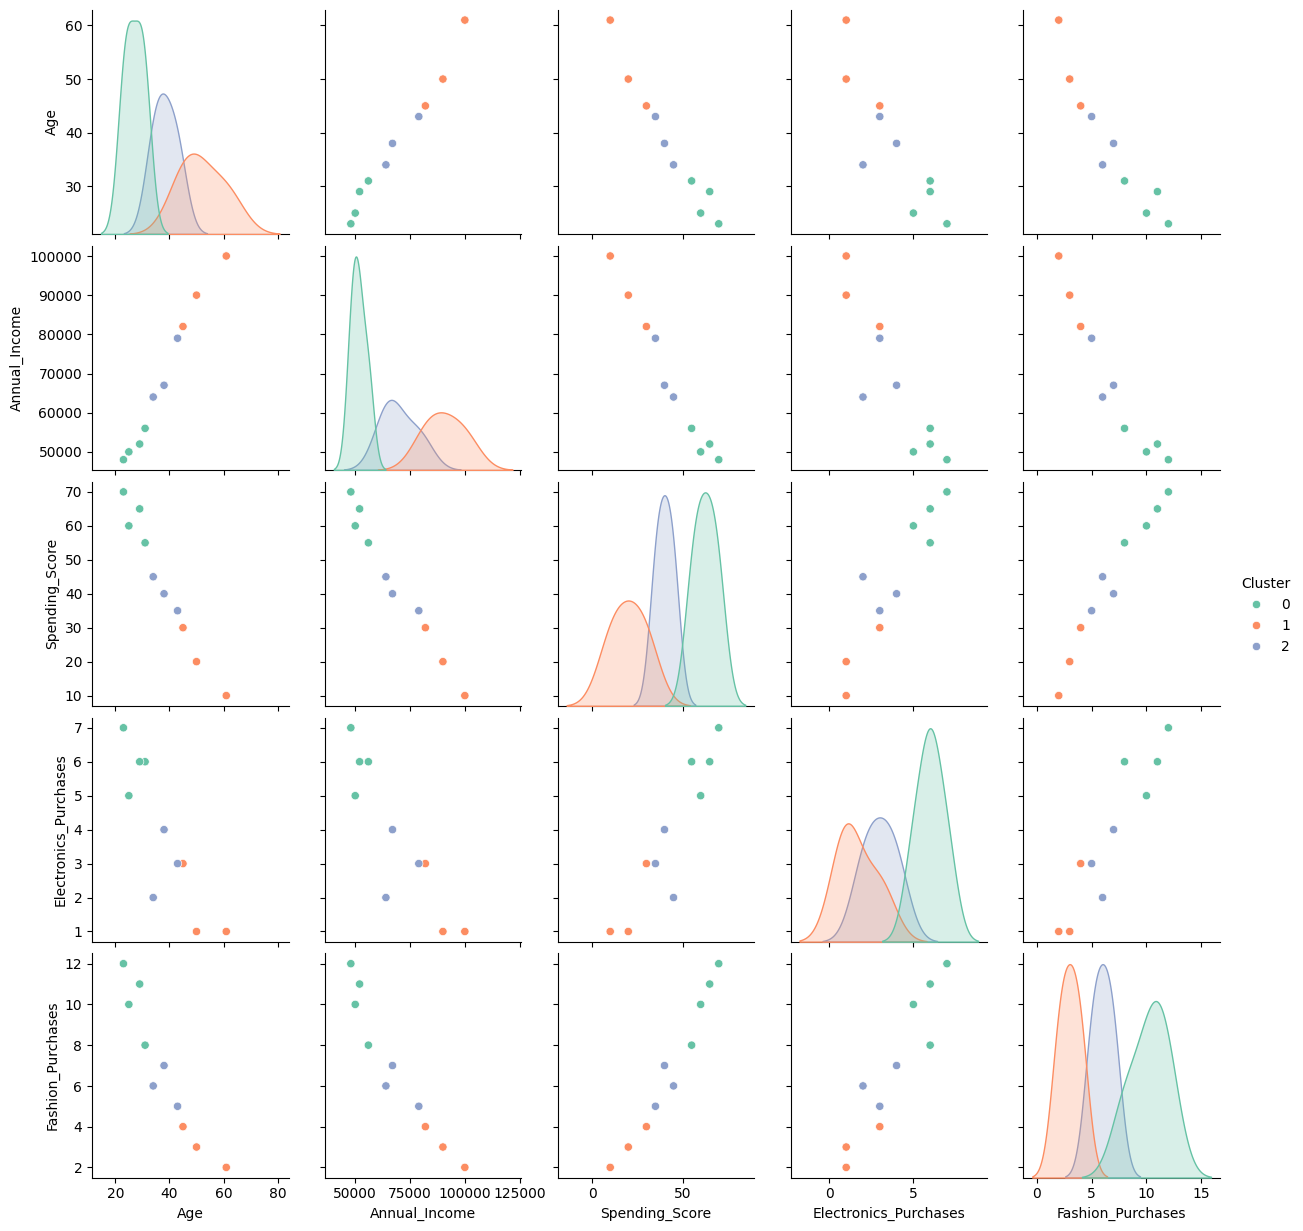

In [57]:
# 5. Visualizing Clusters
import seaborn as sns
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()

In [58]:
# 6. Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, df['Cluster'])
sil_score

np.float64(0.4206104889923095)

In [59]:
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.42
